In [1]:
# Installing Astroquery
!pip install astroquery

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from astroquery.skyview import SkyView

In [2]:
# Getting Andromeda data (M31) from SDSSg Survey
primary_hdu = SkyView.get_images("M31", "DSS1 Blue", pixels = 600, radius = 150 * u.arcmin)[0][0]

In [4]:
# Getting the header data
primary_hdu.header

SIMPLE  =                    T / Written by SkyView Tue Mar 26 08:46:16 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [3]:
# Getting the image data and storing
M31_DSS1Blue_Pixels = primary_hdu.data

In [4]:
# Getting the Shape
M31_DSS1Blue_Pixels.shape

(600, 600)

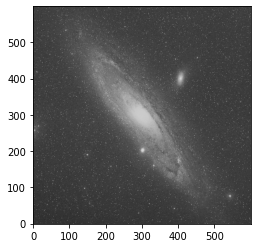

In [5]:
# Plotting the image
plt.imshow(M31_DSS1Blue_Pixels, cmap= 'gray', origin = 'lower')

### **Creating FITS File**

In [8]:
# Importing fits from io module of astropy
from astropy.io import fits

In [11]:
# Create HDUList() to store diff HDUs
HDU_List = fits.HDUList()

# Creating a Primay HDU
hdu1 = fits.PrimaryHDU()

# Adding Header data
hdu1.header = primary_hdu.header

# Adding Pixel Data
hdu1.data = M31_DSS1Blue_Pixels

# Appending Primary HDU to HDU List
HDU_List.append(hdu1)

# Generating the FITS file
HDU_List.writeto("Dummy_FITS_file.fits")

### **Pixel Scaling**

In [6]:
# Taking SDSSg image from SkyView
SDSSg_hdu = SkyView.get_images("M31", "SDSSg")[0][0]

HTTPError: HTTP Error 404: Not Found

In [ ]:
# Storing Data
M31_Pixels = SDSSg_hdu.data

In [ ]:
# Visualizing
plt.imshow(M31_Pixels, cmap='gray', origin='lower')
plt.show()

In [ ]:
# Checking basic stats
print("Summary Statistics of M31_Pixels")
print(f"Minimum Value : {np.min(M31_Pixels)}")
print(f"Maximum Value : {np.max(M31_Pixels)}")
print(f"Mean Value : {np.mean(M31_Pixels)}")
print(f"Spread : {np.std(M31_Pixels)}")

In [ ]:
# Creating a Histogram
plt.hist(M31_Pixels.flat, bins = 500) # .flat converts it into 1D image
plt.show()

In [ ]:
# Creating a Visualizing function

def pixel_plot(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off')

In [ ]:
# Creating a Compare function

def compare_plots(scaled_array, title):
  plt.subplot(1, 2, 1)
  pixel_plot(M31_Pixels, title='Original Image', color='black')

  plt.subplot(1, 2, 2)
  pixel_plot(scaled_array, title=title, color='lime')

  plt.show()

In [ ]:
# Creating a MinMax Scaling function

def minmax_scale(pixel_array):
  nume = pixel_array - np.min(pixel_array)
  deno = np.max(pixel_array) - np.min(pixel_array)

    # Check if deno is zero to avoid division by zero
  if deno == 0:
    return np.zeros_like(pixel_array)

  return nume / deno

In [ ]:
# Normalizing M31_SDSSg_Pixels using MinMax Scaling

M31_Pixels_minmaxscaled = minmax_scale(M31_Pixels)
compare_plots(M31_Pixels_minmaxscaled, title='MinMax Scaled Image')

In [ ]:
# Standardization or Z-Scale function:

def zscale(pixel_array):
  nume = pixel_array - np.mean(pixel_array)
  deno = np.std(pixel_array)
  return nume/deno

In [ ]:
# Normalizing M31_SDSSg_Pixels using Z Scaling

M31_Pixels_zscaled = zscale(M31_Pixels)
compare_plots(M31_Pixels_zscaled, title='Z Scaled')

In [ ]:
# Creating a Logarithmic Scaling Function:

def loga(pixel_array):
  return np.log(pixel_array)

In [ ]:
# Normalizing M31_SDSSg_Pixels using Logarithmic Function:

M31_Pixels_logscaled = loga(M31_Pixels)
compare_plots(M31_Pixels_logscaled, title='Log Scaled Image')

In [ ]:
# Creating a Histogram with the Log scaled Pixels:

plt.hist(M31_Pixels_logscaled.flat, bins = 300)
plt.show()

In [ ]:
# Creating a Square Root Scaling Function:

def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

In [ ]:
# Normalizing M31_SDSSg_Pixels using Square Root Scaling:

M31_Pixels_sqrtscaled = sqrt_scaling(M31_Pixels)
compare_plots(M31_Pixels_sqrtscaled, title='Square Root Scaled Image')

### ***Z Scale Interval***

In [ ]:
# Importing libraries

from astropy.visualization import ZScaleInterval

In [ ]:
# Creating an object

zsi = ZScaleInterval()

In [ ]:
# Getting Min and Max of M31_Pixels_logscaled

zsi_min, zsi_max = zsi.get_limits(M31_Pixels_logscaled)

In [ ]:
print(f'Minimum = {zsi_min}')
print(f'Maximum = {zsi_max}')

In [ ]:
# Plotting the M31_Pixels_logscaled using the Interval

img = plt.imshow(M31_Pixels_logscaled, vmin = zsi_min, vmax = zsi_max, cmap = 'gray', origin = 'lower')
plt.show()

In [ ]:
# Getting the array from the above image and saving it

zsi_image_array = img.make_image(renderer=None, unsampled = True)[0] #unsampled keeps the original array shape

In [ ]:
# Getting the shape:

zsi_image_array.shape

In [ ]:
import cv2

In [ ]:
# Converting 4 channel to grayscale

zsi_image_array_gray = cv2.cvtColor(zsi_image_array, cv2.COLOR_BGRA2GRAY)

In [ ]:
# Visualizing

pixel_plot(zsi_image_array_gray, title='Gray ZScaleInterval Image', color ='lime')

In [ ]:
# Histogram

plt.hist(zsi_image_array_gray.flat, bins = 300)
plt.show()

### **Gaussian De-Noising**

In [ ]:
# Creating a Kernel
from scipy.signal import convolve2d

In [ ]:
kernel = np.ones((3,3))/9
kernel

In [ ]:
Gaussian_Kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])
Gaussian_Kernel

In [ ]:
# Convolution using the normal Kernel
convolved_image_normal = convolve2d(M31_Pixels, kernel, mode = 'same') # mode keeps the size of output image same as the original

In [ ]:
# Convolution using the Gaussian Kernel
convolved_image_gaussian = convolve2d(M31_Pixels, Gaussian_Kernel, mode = 'same')

In [ ]:
# Visualizing the convolved_image_normal
pixel_plot(convolved_image_normal, title = 'Normal Kernel Convolution', color = 'lime')

In [ ]:
# Visualizing the convolved_image_gaussian
pixel_plot(convolved_image_gaussian, title = 'Gaussian Kernel Convolution', color = 'lime')

In [ ]:
# Using zsi_image_array_gray with Gaussian Kernel

convolved_image_gaussian_zsi = convolve2d(zsi_image_array_gray, Gaussian_Kernel, mode = 'same')

In [ ]:
# Visualizing
pixel_plot(convolved_image_gaussian_zsi, title = 'Gaussian Kernel Convolution with ZSI Image', color = 'lime')

In [ ]:
# Getting Histogram
plt.hist(convolved_image_gaussian_zsi.flat, bins=300)
plt.show()

### **Enhancing the Linear Features**

In [ ]:
# Creating a Spectral List
Spectral_list = ['gray', 'jet', 'hot', 'prism', 'nipy_spectral']

In [ ]:
# Importing meijering and sato filters from skimage
from skimage.filters import meijering, sato

In [ ]:
# Using the filters
meijering_output = meijering(convolved_image_gaussian_zsi)
sato_output = sato(convolved_image_gaussian_zsi)

In [ ]:
# For each Spectral list element, visualizing the output for the meijering filter:
for cm in Spectral_list:
  plt.imshow(meijering_output, cmap = cm, origin = 'lower')
  plt.title(f'Meijering Output with {cm}')
  plt.axis('off')
  plt.show()

In [ ]:
# For each Spectral list element, visualizing the output for the sato filter:
for cm in Spectral_list:
  plt.imshow(sato_output, cmap = cm, origin = 'lower')
  plt.title(f'Sato Output with {cm}')
  plt.axis('off')
  plt.show()

### **Feature Detection and Extraction**

In [ ]:
# Corner_Foerstner
from skimage.feature import corner_foerstner

In [ ]:
feature_output = corner_foerstner(convolved_image_gaussian_zsi)

In [ ]:
print('Length :', len(feature_output))
print('Type :', type(feature_output))

In [ ]:
# Visualizing
for cm in Spectral_list:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0], cmap = cm, origin = 'lower')
  plt.title(f'Error Image with {cm}')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1], cmap = cm, origin = 'lower')
  plt.title(f'Roundness of error with {cm}')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

### **MultiScale_Basic_Features**

In [ ]:
from skimage.feature import multiscale_basic_features

In [ ]:
feature_image = multiscale_basic_features(convolved_image_gaussian_zsi)

In [ ]:
type(feature_image)

In [ ]:
feature_image.shape

In [ ]:
# Splitting and storing all 24 channels
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(feature_image)

In [ ]:
P1.shape

In [ ]:
P24.shape

In [ ]:
# Creating a list of these pixels
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

In [ ]:
# Visualizing all in prism
for i, feature in enumerate(Pixels):
  plt.imshow(feature, cmap = 'prism', origin = 'lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_7680/2830201818.py, line 1)